# 1 - Summarizing and Communicating Numbers. Lots of Numbers

In [1]:
import os
import pandas as pd
import random
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(src_path)

from src import dataframe_visualizer

In [2]:
# Read the data
df = pd.read_csv('inputs/02-1-bean-data-full-x.csv')

# Add the column name as a new record
df = pd.concat([df, df.columns.to_frame().T], ignore_index=True)

# Rename column
df.rename(columns={'219': 'guess'}, inplace=True)

# Convert guess column to int
df['guess'] = df['guess'].astype(int)

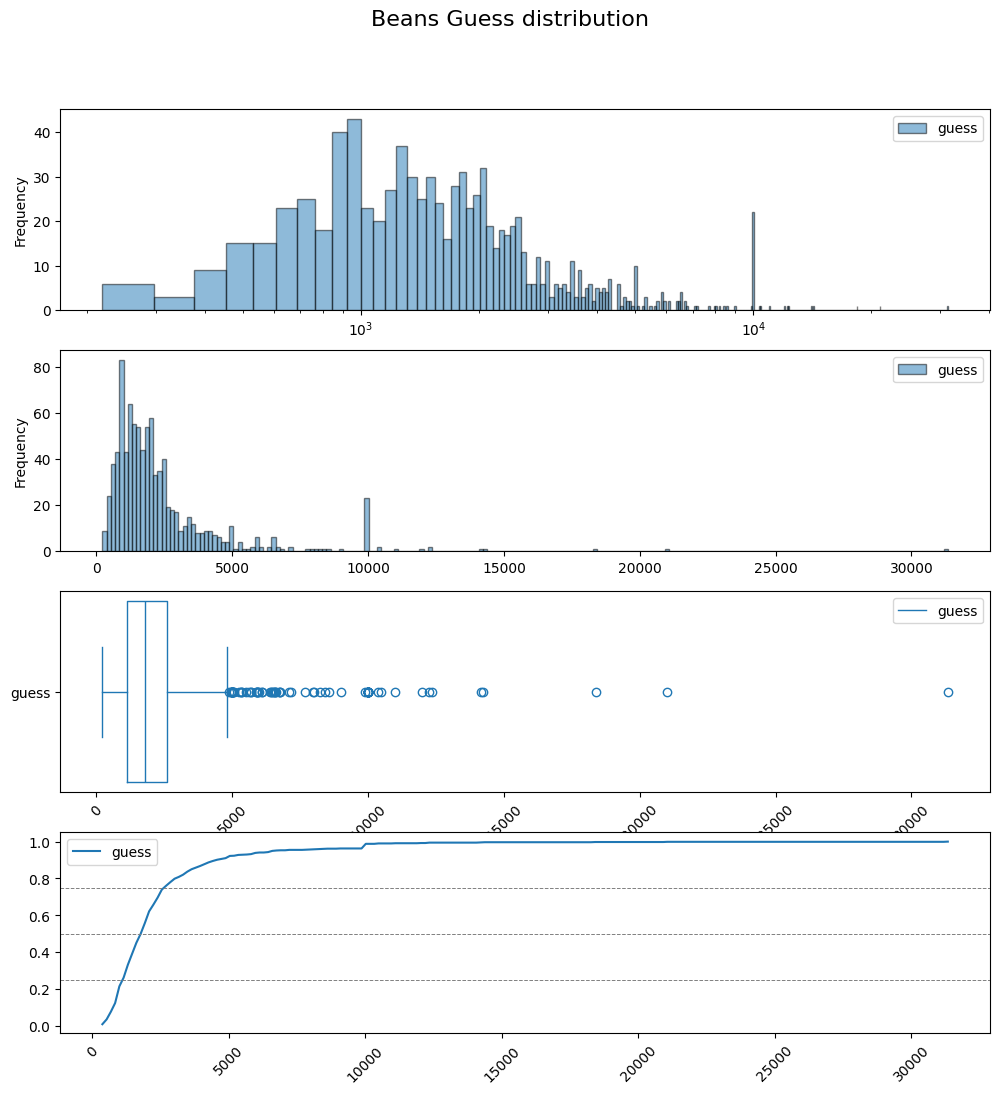

In [3]:
v = dataframe_visualizer.DataFrameVisualizer(df)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'histogram',
        'y_columns': ['guess'],
        'colors': ['blue'], # default None
        'legend': True, # default True
        'bins': 400, # default 10
    },
    {
        'plot_type': 'histogram',
        'y_columns': ['guess'],
        'colors': ['blue'], # default None
        'legend': True, # default True
        'bins': 200, # default 10
    },
    {
        'plot_type': 'boxplot_and_whiskers',
        'y_columns': ['guess'],
        'colors': ['blue'], # default None
        'legend': True, # default True
    },
    {
        'plot_type': 'histogram_acummulated',
        'y_columns': ['guess'],
        'colors': ['blue'], # default None
        'legend': True, # default True
        'bins': 200, # default 10
    },
]

figure_params = {
    'n_plots': 4, # default 1
    'fig_length': 12, # default 10
    'fig_height': 12, # default 6
    'x_rotation': 45, # default 45
    'share_x': False, # default False
    'share_y': False, # default False
    'x_limits': None, # default None
    'y_limits': None, # default None
    'log_axis': ['x',None, None, None], # default False
    'title': 'Beans Guess distribution' # default None
}

v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

In [4]:
df['guess'].describe()

count      915.000000
mean      2408.745355
std       2422.170502
min        219.000000
25%       1110.000000
50%       1775.000000
75%       2599.500000
max      31337.000000
Name: guess, dtype: float64

# Opposite sex partners

In [5]:
# Read data
df = pd.read_csv('inputs/02-4-sexual-partners-counts-x.csv')

In [6]:
df.head()

,NumPartners,MenCount,MenPercent,WomenCount,WomenPercent
0,0,6,0.75,5,0.42
1,1,100,12.56,212,17.77
2,2,44,5.53,93,7.80
3,3,39,4.90,130,10.90
4,4,58,7.29,88,7.38


In [7]:
# Cut the dataset in value of MenCount or WomenCount that overpass 50
df = df[(df['MenCount'] < 50) & (df['WomenCount'] < 50)]

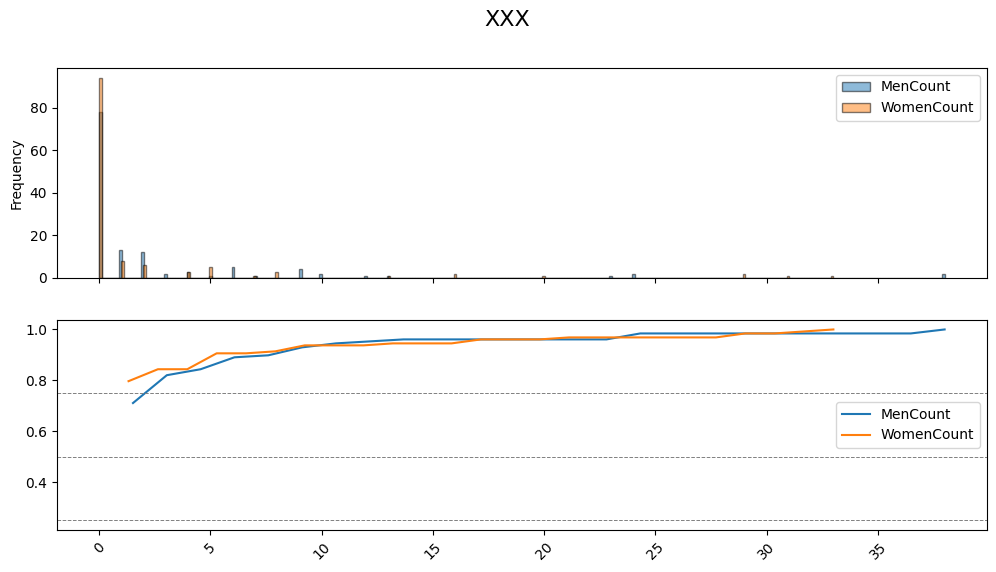

In [12]:
# Create an instance of DataFrameVisualizer
v = dataframe_visualizer.DataFrameVisualizer(df)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'histogram',
        'y_columns': ['MenCount', 'WomenCount'],
        'colors': ['blue', 'orange'], # default None
        'legend': True, # default True
        'bins': 300 # default 10
    },
    {
        'plot_type': 'histogram_acummulated',
        'y_columns': ['MenCount', 'WomenCount'],
        'colors': ['blue', 'orange'], # default None
        'legend': True, # default True
        'bins': 25 # default 10
    },
]

figure_params = {
    'n_plots': 2, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'title': 'XXX' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

In [14]:
df['MenCount'].value_counts()

MenCount
0     78
1     13
2     12
6      5
9      4
4      3
24     2
38     2
3      2
10     2
23     1
5      1
7      1
12     1
13     1
Name: count, dtype: int64

# Relationship between variables

In [18]:
# Read data
df1 = pd.read_csv('inputs/02-5-child-heart-surgery-1991-x.csv')
df2 = pd.read_csv('inputs/02-5-child-heart-surgery-2012-x.csv')


,Hospital,Operations,Survivors,Deaths,ThirtyDaySurvival,PercentageDying
0,London - Harley Street,418,413,5,98.8,1.2
1,Leicester,607,593,14,97.7,2.3
2,Newcastle,668,653,15,97.8,2.2
3,Glasgow,760,733,27,96.4,3.6
4,Southampton,829,815,14,98.3,1.7
5,Bristol,835,821,14,98.3,1.7
6,Dublin,983,960,23,97.7,2.3
7,Leeds,1038,1016,22,97.9,2.1
8,London - Brompton,1094,1075,19,98.3,1.7
9,Liverpool,1132,1112,20,98.2,1.8


In [20]:
df1.columns

Index(['Hospital', 'Operations', 'Survivors', 'Deaths', 'ThirtyDaySurvival',
       'PercentageDying'],
      dtype='object')

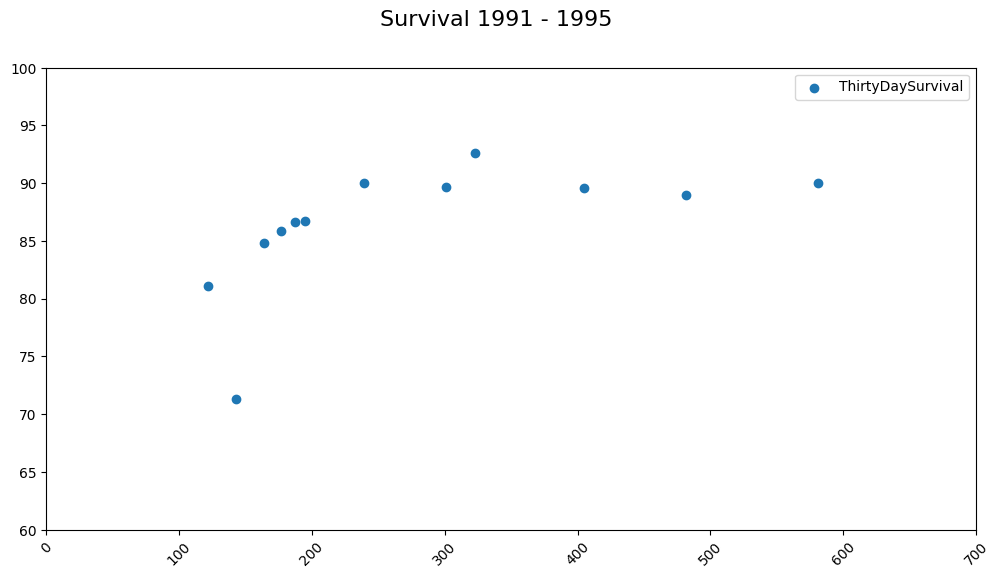

In [26]:
v = dataframe_visualizer.DataFrameVisualizer(df1)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'scatterplot',
        'x_column': 'Operations',
        'y_columns': ['ThirtyDaySurvival'],
        'colors': ['blue'], # default None
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'x_limits': [(0,700)], # default None
    'y_limits': [(60,100)], # default None
    # 'log_axis': ['x','y','both'], # default None
    'title': 'Survival 1991 - 1995' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

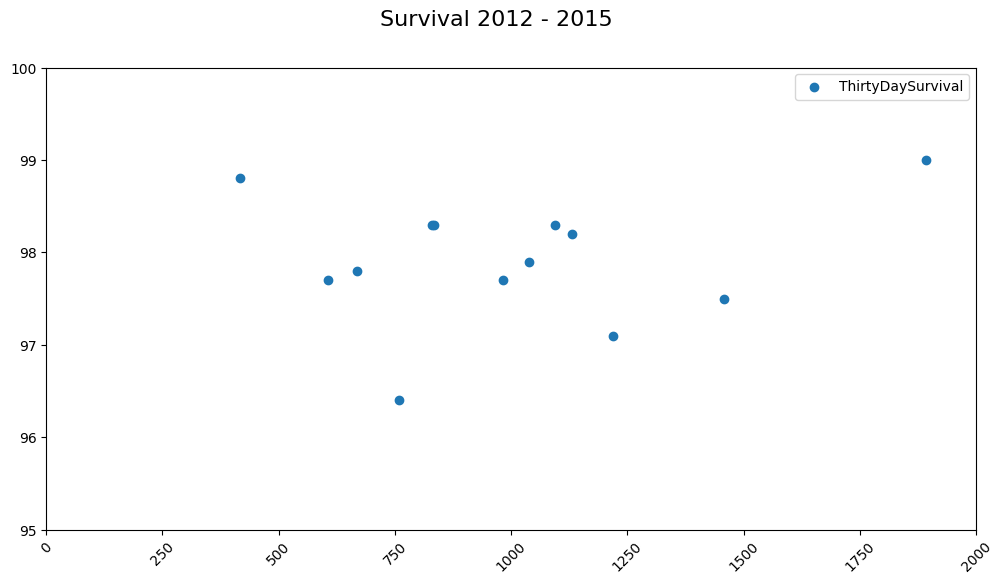

In [28]:
v = dataframe_visualizer.DataFrameVisualizer(df2)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'scatterplot',
        'x_column': 'Operations',
        'y_columns': ['ThirtyDaySurvival'],
        'colors': ['blue'], # default None
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'x_limits': [(0,2000)], # default None
    'y_limits': [(95,100)], # default None
    # 'log_axis': ['x','y','both'], # default None
    'title': 'Survival 2012 - 2015' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

In [30]:
# Compute Pearson and Rank correlation between Operations and ThirtyDaySurvival
df1[['Operations', 'ThirtyDaySurvival']].corr(method='pearson')

,Operations,ThirtyDaySurvival
Operations,1.00000,0.58369
ThirtyDaySurvival,0.58369,1.00000


In [31]:
# Compute Pearson and Rank correlation between Operations and ThirtyDaySurvival
df2[['Operations', 'ThirtyDaySurvival']].corr(method='pearson')

,Operations,ThirtyDaySurvival
Operations,1.000000,0.161525
ThirtyDaySurvival,0.161525,1.000000


In [32]:
# Compute Spearman correlation between Operations and ThirtyDaySurvival
df1[['Operations', 'ThirtyDaySurvival']].corr(method='spearman')

,Operations,ThirtyDaySurvival
Operations,1.000000,0.837129
ThirtyDaySurvival,0.837129,1.000000


In [33]:
# Compute Spearman correlation between Operations and ThirtyDaySurvival
df2[['Operations', 'ThirtyDaySurvival']].corr(method='spearman')

,Operations,ThirtyDaySurvival
Operations,1.000000,0.002766
ThirtyDaySurvival,0.002766,1.000000


# Population Evolution

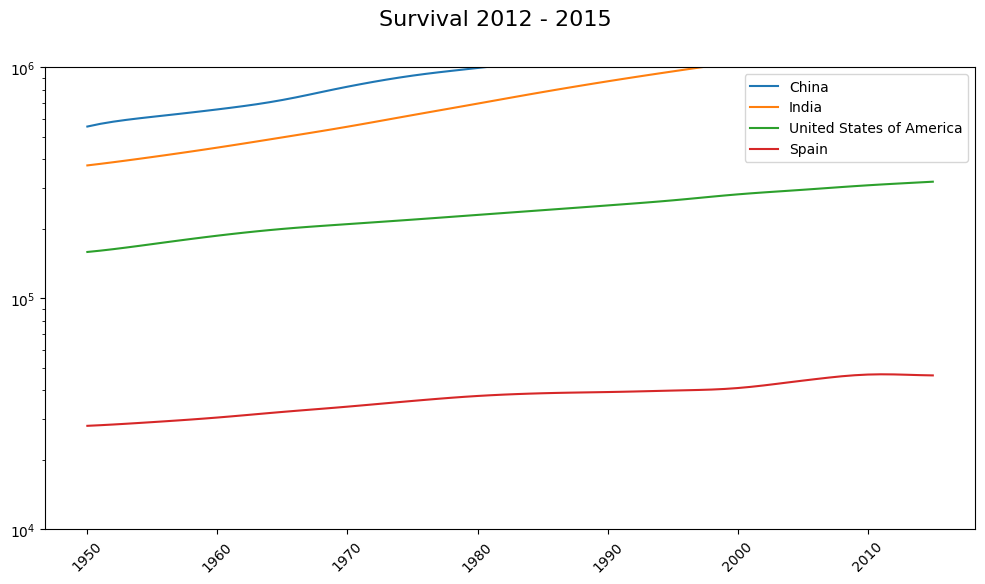

In [ ]:
# Read data
df = pd.read_csv('inputs/02-7-pop-past-future-million-in-51.csv')

v = dataframe_visualizer.DataFrameVisualizer(df)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'lineplot',
        'x_column': 'Year',
        'y_columns': ['China', 'India', 'United States of America', 'Spain'],
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'y_limits': [(10_000, 10_000_000)], # default None
    'log_axis': ['y'], # default None
    'title': 'Survival 2012 - 2015' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

In [65]:
# Re

,Year,China,India,United States of America,Russian Federation,Japan,Indonesia,Germany,Brazil,United Kingdom,...,Israel,Central African Republic,Nicaragua,TFYR Macedonia,Albania,Turkmenistan,Eritrea,Libya,Estonia,Singapore
0,1950,554419.28,376325.20,158804.40,102798.66,82802.08,69543.32,69966.24,53974.73,50616.01,...,1257.97,1326.65,1294.99,1254.45,1263.17,1210.99,1142.15,1124.52,1101.00,1022.10
1,1951,569611.08,382245.30,160905.04,104306.14,84315.60,70869.61,70299.36,55619.22,50621.42,...,1354.10,1339.84,1331.75,1290.41,1287.50,1231.83,1159.80,1142.97,1113.25,1067.79
2,1952,582029.30,388538.62,163324.85,105969.20,85658.68,72309.90,70619.50,57307.48,50686.06,...,1451.49,1353.47,1371.52,1320.98,1316.09,1258.39,1179.54,1163.89,1125.24,1119.93
3,1953,592567.86,395160.09,165988.19,107729.37,86869.43,73866.52,70929.26,59030.86,50797.27,...,1546.24,1367.80,1414.28,1347.46,1348.10,1289.83,1201.12,1187.73,1136.90,1177.58
4,1954,601971.22,402077.03,168827.61,109537.79,87980.32,75539.74,71233.13,60784.89,50945.40,...,1635.78,1383.07,1459.85,1370.98,1382.88,1325.43,1224.38,1214.83,1148.21,1239.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,1367480.26,1247236.03,311051.37,143263.99,128505.40,245707.51,80933.98,198686.69,63811.88,...,7568.77,4476.15,5807.82,2072.38,2926.66,5174.06,4474.69,6193.50,1328.45,5176.02
62,2012,1375198.62,1263065.85,313335.42,143420.60,128426.38,248883.23,81066.23,200560.98,64250.33,...,7699.11,4490.42,5877.11,2074.04,2920.04,5267.84,4560.98,6198.26,1324.93,5270.96
63,2013,1382793.21,1278562.21,315536.68,143597.23,128312.92,252032.26,81265.14,202408.63,64641.11,...,7821.11,4499.65,5945.75,2075.74,2918.98,5366.28,4651.00,6195.97,1321.56,5360.84
64,2014,1390110.39,1293859.29,317718.78,143761.38,128162.87,255131.12,81489.66,204213.13,65015.69,...,7941.33,4515.39,6014.00,2077.50,2920.78,5466.24,4746.05,6204.11,1318.36,5448.34
